In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

In [110]:
df = pd.read_csv('9_19_1000_1_result.csv')

In [89]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [90]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [91]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
ETE3_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [92]:
print(len(True_Duplication))

836


In [93]:
print(len(O_Duplication))

836


In [94]:
print(len(ETE3_Duplication))

836


In [95]:
True_Duplication['Replicate']=[i for i in range(836)]
O_Duplication['Replicate']=[i for i in range(836)]
ETE3_Duplication['Replicate']=[i for i in range(836)]


In [96]:
true_reconils_dups= pd.DataFrame(concat_true-concat_O)
val =['reconcILS' for i in range(836)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [97]:
true_ete3_dups= pd.DataFrame((concat_true-concat_ETE3))
val =['DLCpar' for i in range(836)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [98]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,0,0,reconcILS
2,1,1,reconcILS
3,0,0,reconcILS
4,0,0,reconcILS
...,...,...,...
831,0,1,reconcILS
832,0,1,reconcILS
833,0,0,reconcILS
834,1,1,reconcILS


In [99]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,0,0,DLCpar
1,0,0,DLCpar
2,1,1,DLCpar
3,0,0,DLCpar
4,0,0,DLCpar
...,...,...,...
831,0,1,DLCpar
832,0,1,DLCpar
833,0,0,DLCpar
834,1,1,DLCpar


In [100]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [101]:
val

221

In [102]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,0
1,reconcILS,Duplication,0
2,reconcILS,Duplication,1
3,reconcILS,Duplication,0
4,reconcILS,Duplication,0
...,...,...,...
3339,DLCpar,Loss,1
3340,DLCpar,Loss,1
3341,DLCpar,Loss,0
3342,DLCpar,Loss,1


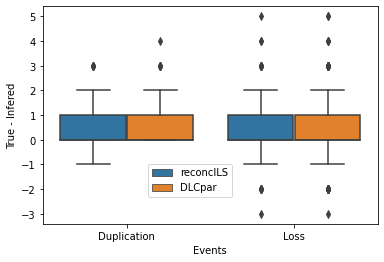

In [103]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.jpg', dpi=500)


In [104]:
result1

,0,1
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
831,2,2
832,1,1
833,1,1
834,1,1


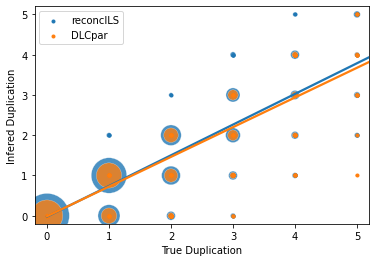

<Figure size 432x288 with 0 Axes>

In [105]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

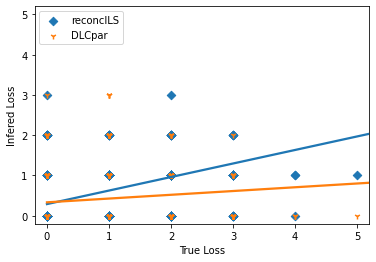

<Figure size 432x288 with 0 Axes>

In [106]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

In [107]:
r =result1.astype('category')

In [108]:
r

,0,1
0,1,1
1,1,1
2,2,1
3,0,0
4,1,1
...,...,...
831,1,0
832,2,1
833,0,0
834,2,1


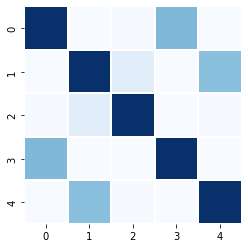

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [67]:
np.array([list(result1[0]), list(result1[1])])

array([[1, 1, 2, ..., 0, 2, 1],
       [1, 1, 1, ..., 0, 1, 1]])

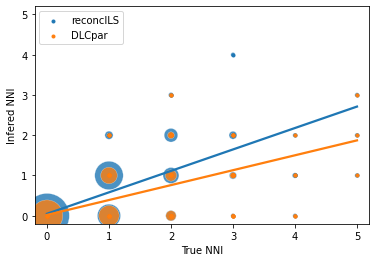

<Figure size 432x288 with 0 Axes>

In [87]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],ETE3_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')

#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

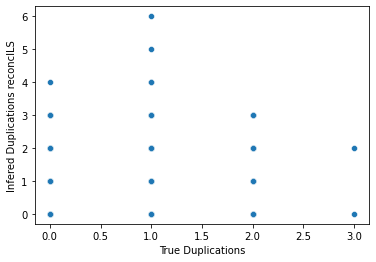

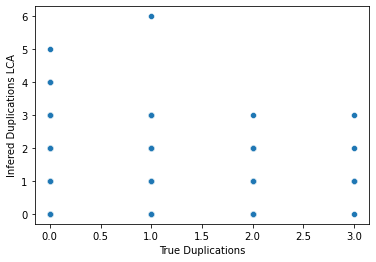

In [69]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

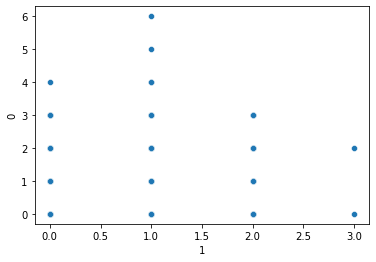

In [70]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [111]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [112]:
rho

0.19974920154797746

In [113]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [114]:
rho

0.5857584796166706

In [115]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [116]:
rho

0.8706893376025674

In [117]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [118]:
rho

0.8715649781662739

In [119]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [120]:
rho

0.6115145717377591

In [121]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI']))

In [84]:
rho

0.7477744445481845